In [1]:
import pandas as pd
import altair as alt
alt.data_transformers.enable("vegafusion")

# Load the data
fp = "../data/processed/player/L. Doncic_games.csv"
data = pd.read_csv(fp)

print(f"Data loaded from {fp} with {data.shape[0]} rows and {data.shape[1]} columns.")

Data loaded from ../data/processed/player/L. Doncic_games.csv with 3671 rows and 19 columns.


In [2]:
df = data.copy()
df_shots = df[df["shotVal"] > 1]
df_makes = df[df["scoreVal"] > 1]
df_misses = df[(df["scoreVal"] == 0) & (df["shotVal"] > 1)]

def plot_shots(df, title):
    chart = alt.Chart(df).mark_circle(size=100, opacity=0.4).encode(
        x=alt.X('xLegacy:Q', scale=alt.Scale(domain=[-240, 240])),
        y=alt.Y('yLegacy:Q', scale=alt.Scale(domain=[-50, 800])),
        color='shotVal:N',
        tooltip=['xLegacy', 'yLegacy', 'scoreVal']
    ).properties(
        title=title,
        width=500,
        height=800
    )
    return chart

makes = plot_shots(df_makes, "Makes")
misses = plot_shots(df_misses, "Misses")

makes| misses

alt.HConcatChart(...)

In [3]:
fp = "../data/processed/S2324_all_games.csv"
data = pd.read_csv(fp)

print(f"Data loaded from {fp} with {data.shape[0]} rows and {data.shape[1]} columns.")

Data loaded from ../data/processed/S2324_all_games.csv with 598705 rows and 19 columns.


In [4]:
x = data["xLegacy"]
y = data["yLegacy"]

x.max(), x.min(), y.max(), y.min()

(250, -250, 842, -51)

In [7]:
def plot_shots(df, title):
    chart = alt.Chart(df).mark_circle(size=100, opacity=0.4).encode(
        x=alt.X('xLegacy:Q', scale=alt.Scale(domain=[-240, 240])),
        y=alt.Y('yLegacy:Q', scale=alt.Scale(domain=[-52.5, 887.5])),
        color='shotVal:N',
        tooltip=['xLegacy', 'yLegacy', 'scoreVal']
    ).properties(
        title=title,
        width=500,
        height=800
    )
    return chart

plot_shots(outliers, "Outliers")

alt.Chart(...)

# Court dimensions

## **Dimensions**
| dimension | feet | min | max |
|------------|------|-----|---|
| lat (width) | 50 | -250 | 250 |
| long (length) | 94 | -52.5 | 887.5 |

## **Boundaries**
| marking | long | lat |
|----|----|----|
| baseline (basket) | -52.5 | all |
| baseline (backcourt) | 887.5 | all |
| sideline (left) | all | -250 |
| sideline (right) | all | 250 |

In [8]:
data.sample(5)

,game_id,period,clock,home,scoreHome,away,scoreAway,playerNameI,teamTricode,description,actionType,subType,xLegacy,yLegacy,shotDistance,isFieldGoal,shotVal,scoreVal,location
395732,S2324-G1063,2,07:22,IND,NaN,LAL,NaN,S. Dinwiddie,LAL,Dinwiddie REBOUND (Off:0 Def:1),Rebound,Unknown,0,0,0,0,NaN,NaN,v
102760,S2324-G0894,4,09:15,WAS,NaN,ORL,NaN,D. Avdija,WAS,Avdija S.FOUL (P2.T1) (J.DeRosa),Foul,Shooting,0,0,0,0,NaN,NaN,h
246072,S2324-G0934,3,10:22,CLE,NaN,PHX,NaN,D. Booker,PHX,Booker REBOUND (Off:2 Def:1),Rebound,Unknown,0,0,0,0,NaN,NaN,v
147807,S2324-G0070,1,01:51,CHI,NaN,OKC,NaN,Z. LaVine,CHI,MISS LaVine 25' 3PT Step Back Jump Shot,Missed Shot,Step Back Jump shot,-67,240,25,1,3.0,0.0,h
292338,S2324-G0241,3,03:36,WAS,69.0,ATL,94.0,D. Hunter,ATL,Hunter 1' Running Layup (20 PTS) (Murray 10 AST),Made Shot,Running Layup Shot,7,8,1,1,2.0,2.0,v


In [10]:
fgs = data[data["shotVal"] > 1]
fgs.sample(5)

,game_id,period,clock,home,scoreHome,away,scoreAway,playerNameI,teamTricode,description,actionType,subType,xLegacy,yLegacy,shotDistance,isFieldGoal,shotVal,scoreVal,location
211445,S2324-G0558,2,08:19,WAS,38.0,DET,35.0,L. Shamet,WAS,Shamet 26' 3PT Jump Shot (8 PTS) (Wright 3 AST),Made Shot,Jump Shot,9,261,26,1,3.0,3.0,h
477532,S2324-G0970,2,05:33,NOP,55.0,POR,52.0,D. Ayton,POR,Ayton 10' Floating Jump Shot (12 PTS) (Simons ...,Made Shot,Floating Jump shot,6,104,10,1,2.0,2.0,v
268090,S2324-G0943,2,05:21,UTA,NaN,BOS,NaN,J. Tatum,BOS,MISS Tatum 15' Turnaround Jump Shot,Missed Shot,Turnaround Jump Shot,-138,64,15,1,2.0,0.0,v
204587,S2324-G1220,2,07:01,MIA,39.0,CLE,32.0,M. Strus,CLE,Strus 29' 3PT Pullup Jump Shot (5 PTS) (Mitche...,Made Shot,Pullup Jump shot,-138,256,29,1,3.0,3.0,v
45432,S2324-G0600,3,01:42,LAC,77.0,BKN,92.0,N. Claxton,BKN,Claxton 1' Alley Oop Dunk (14 PTS) (Thomas 5 AST),Made Shot,Alley Oop Dunk Shot,1,8,1,1,2.0,2.0,v


In [14]:
fgs["shotDistance"].describe()


count    218702.000000
mean         12.571303
std          10.848815
min           0.000000
25%           2.000000
50%           9.000000
75%          25.000000
max          85.000000
Name: shotDistance, dtype: float64

<Axes: xlabel='xLegacy', ylabel='yLegacy'>

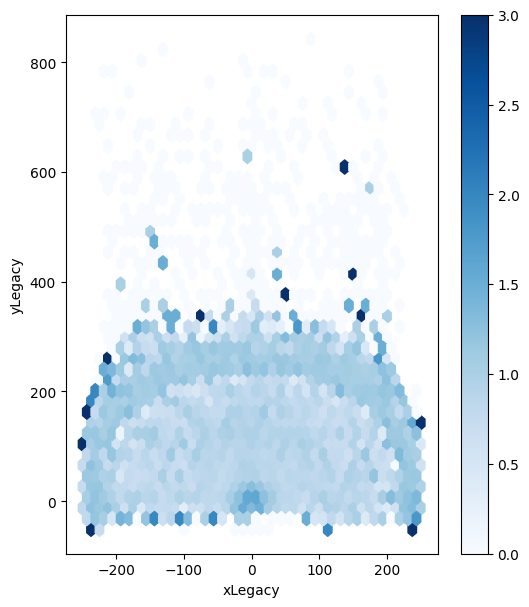

In [40]:
fgs.plot.hexbin(x="xLegacy", y="yLegacy", C="scoreVal", gridsize=40, cmap="Blues", figsize=(6, 7))

In [51]:
from scipy.spatial import distance

def is_3pt(x, y):
    """
    Function returns 'true' if the shot is a 3pt shot, and 'false' otherwise.

    Args:
      x (float): The x-coordinate of the shot.
      y (float): The y-coordinate of the shot.

    Returns:
      bool: True if the shot is a 3pt shot, and False otherwise.
    """

    if (y <= 87.5) and (x >= -220 and x <= 220):  # Below the break
        return True
    elif (y > 87.5) and (distance.euclidean((x, y), (0, 0)) >= 237.5):  # Above the break
        return True
    else:
        return False

is_3pt(15, 237.0)


False